In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Line Plots ##

In [2]:
movies = Table.read_table('movies_by_year.csv')
movies

Year,Total Gross,Number of Movies,#1 Movie
2015,11128.5,702,Star Wars: The Force Awakens
2014,10360.8,702,American Sniper
2013,10923.6,688,Catching Fire
2012,10837.4,667,The Avengers
2011,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,10565.6,536,Toy Story 3
2009,10595.5,521,Avatar
2008,9630.7,608,The Dark Knight
2007,9663.8,631,Spider-Man 3
2006,9209.5,608,Dead Man's Chest


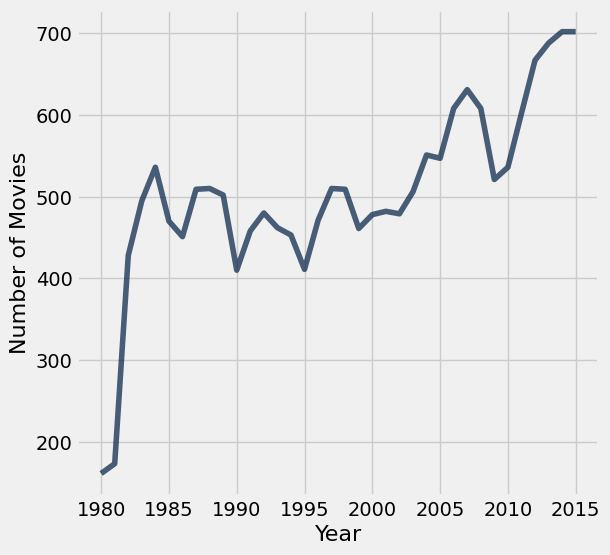

In [3]:
# The call is
# t.plot(x_label, y_label)

movies.plot('Year', 'Number of Movies')

In [4]:
century_21 = movies.where('Year', are.above_or_equal_to(2000))
century_21.show()

Year,Total Gross,Number of Movies,#1 Movie
2015,11128.5,702,Star Wars: The Force Awakens
2014,10360.8,702,American Sniper
2013,10923.6,688,Catching Fire
2012,10837.4,667,The Avengers
2011,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,10565.6,536,Toy Story 3
2009,10595.5,521,Avatar
2008,9630.7,608,The Dark Knight
2007,9663.8,631,Spider-Man 3
2006,9209.5,608,Dead Man's Chest


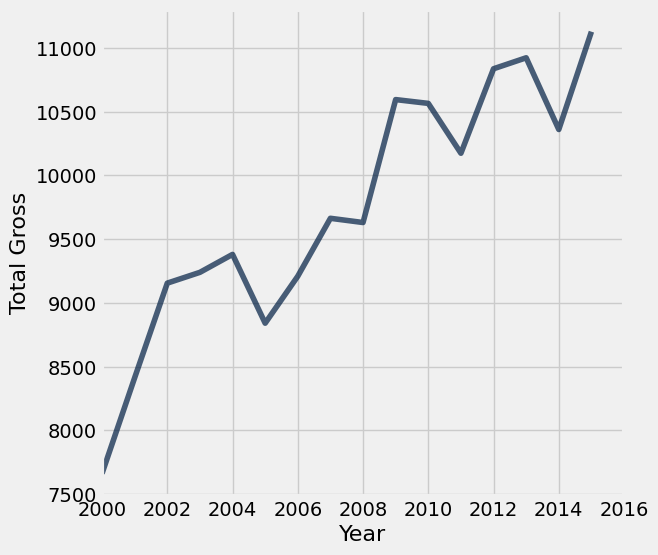

In [5]:
century_21.plot('Year', 'Total Gross')
plots.xlim(2000, 2016);

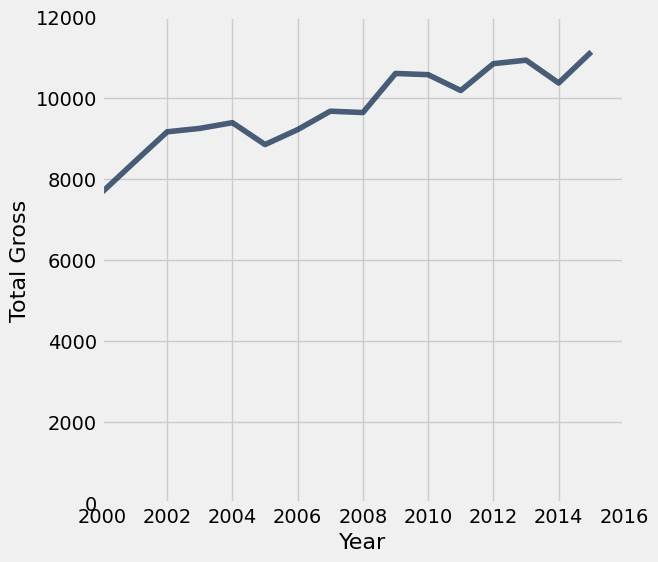

In [6]:
century_21.plot('Year', 'Total Gross')
plots.xlim(2000, 2016)       # optional for Data 8
plots.ylim(0, 12000);        # optional for Data 8

## Scatter Plots ##

In [7]:
actors = Table.read_table('actors.csv').select(0, 2, 1, 3, 4, 5)
actors

Actor,Number of Movies,Total Gross,Average per Movie,#1 Movie,Gross
Harrison Ford,41,4871.7,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,69,4772.8,69.2,The Avengers,623.4
Morgan Freeman,61,4468.3,73.3,The Dark Knight,534.9
Tom Hanks,44,4340.8,98.7,Toy Story 3,415
"Robert Downey, Jr.",53,3947.3,74.5,The Avengers,623.4
Eddie Murphy,38,3810.4,100.3,Shrek 2,441.2
Tom Cruise,36,3587.2,99.6,War of the Worlds,234.3
Johnny Depp,45,3368.6,74.9,Dead Man's Chest,423.3
Michael Caine,58,3351.5,57.8,The Dark Knight,534.9
Scarlett Johansson,37,3341.2,90.3,The Avengers,623.4


In [8]:
actors.column('Total Gross') / actors.column('Number of Movies')

array([ 118.82195122,   69.17101449,   73.25081967,   98.65454545,
         74.47735849,  100.27368421,   99.64444444,   74.85777778,
         57.78448276,   90.3027027 ,   86.68421053,   66.9244898 ,
         53.15666667,   73.8372093 ,  451.84285714,  101.62580645,
        131.2125    ,   62.478     ,   79.67435897,   39.00379747,
         89.16764706,   46.70952381,  125.67826087,   84.86470588,
         76.40540541,   78.38888889,  165.63529412,   56.316     ,
         71.86153846,   65.12619048,   77.89428571,   75.425     ,
        157.75882353,   58.28913043,   67.0225    ,   83.15625   ,
        154.96470588,   89.83103448,   66.72564103,   99.25384615,
        102.308     ,   70.82777778,   94.26666667,   58.65348837,
        100.732     ,  119.06190476,   61.5925    ,   70.36      ,
        106.86086957,   96.66      ])

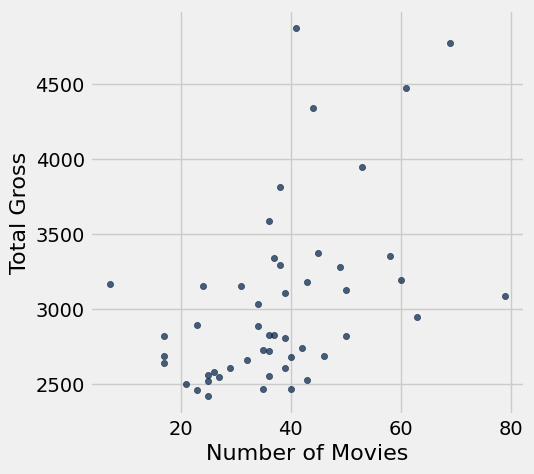

In [9]:
# The call is
# t.scatter(x_label, y_label)

actors.scatter('Number of Movies', 'Total Gross')

In [10]:
actors.where('Actor', 'Robert DeNiro')

Actor,Number of Movies,Total Gross,Average per Movie,#1 Movie,Gross
Robert DeNiro,79,3081.3,39,Meet the Fockers,279.3


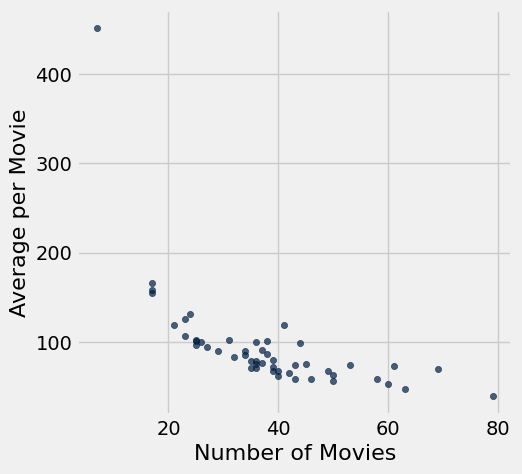

In [11]:
actors.scatter('Number of Movies', 'Average per Movie')

In [12]:
actors.where('Number of Movies', are.below(10))

Actor,Number of Movies,Total Gross,Average per Movie,#1 Movie,Gross
Anthony Daniels,7,3162.9,451.8,Star Wars: The Force Awakens,936.7


## Bar Charts ##

In [13]:
# Highest grossing movies as of 2017
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [14]:
# Convert gross amounts to millions of dollars for readability
millions = np.round(top_movies.column('Gross') / 1000000, 3)
millions_adjusted = np.round(top_movies.column('Gross (Adjusted)') / 1000000, 3)

In [15]:
top_movies = top_movies.with_columns(
    'Millions', millions,
    'Millions (Adjusted)', millions_adjusted,
)
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Millions,Millions (Adjusted)
Gone with the Wind,MGM,198676459,1796176700,1939,198.676,1796.18
Star Wars,Fox,460998007,1583483200,1977,460.998,1583.48
The Sound of Music,Fox,158671368,1266072700,1965,158.671,1266.07
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,435.111,1261.09
Titanic,Paramount,658672302,1204368000,1997,658.672,1204.37
The Ten Commandments,Paramount,65500000,1164590000,1956,65.5,1164.59
Jaws,Universal,260000000,1138620700,1975,260,1138.62
Doctor Zhivago,MGM,111721910,1103564200,1965,111.722,1103.56
The Exorcist,Warner Brothers,232906145,983226600,1973,232.906,983.227
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,184.925,969.01


In [16]:
top10_adjusted = top_movies.take(np.arange(10))
top10_adjusted

Title,Studio,Gross,Gross (Adjusted),Year,Millions,Millions (Adjusted)
Gone with the Wind,MGM,198676459,1796176700,1939,198.676,1796.18
Star Wars,Fox,460998007,1583483200,1977,460.998,1583.48
The Sound of Music,Fox,158671368,1266072700,1965,158.671,1266.07
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,435.111,1261.09
Titanic,Paramount,658672302,1204368000,1997,658.672,1204.37
The Ten Commandments,Paramount,65500000,1164590000,1956,65.5,1164.59
Jaws,Universal,260000000,1138620700,1975,260,1138.62
Doctor Zhivago,MGM,111721910,1103564200,1965,111.722,1103.56
The Exorcist,Warner Brothers,232906145,983226600,1973,232.906,983.227
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,184.925,969.01


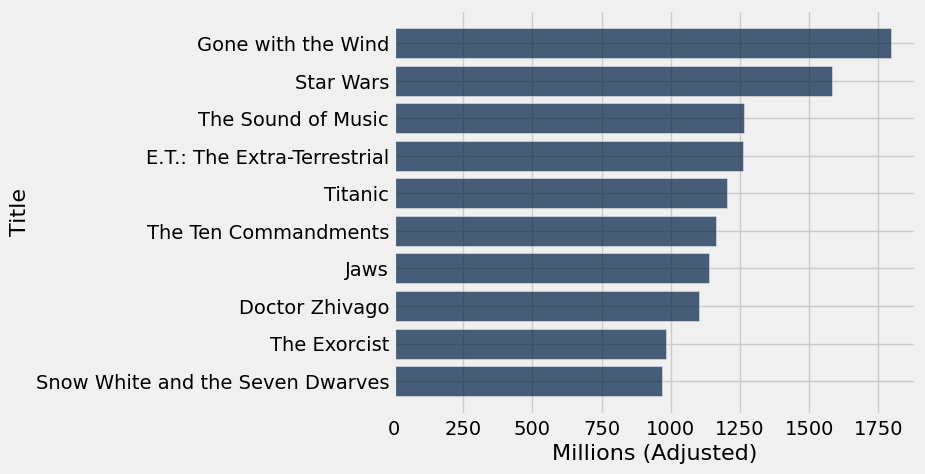

In [17]:
# The call is
# t.barh(categorical_variable, numerical_variable)

top10_adjusted.barh('Title', 'Millions (Adjusted)')

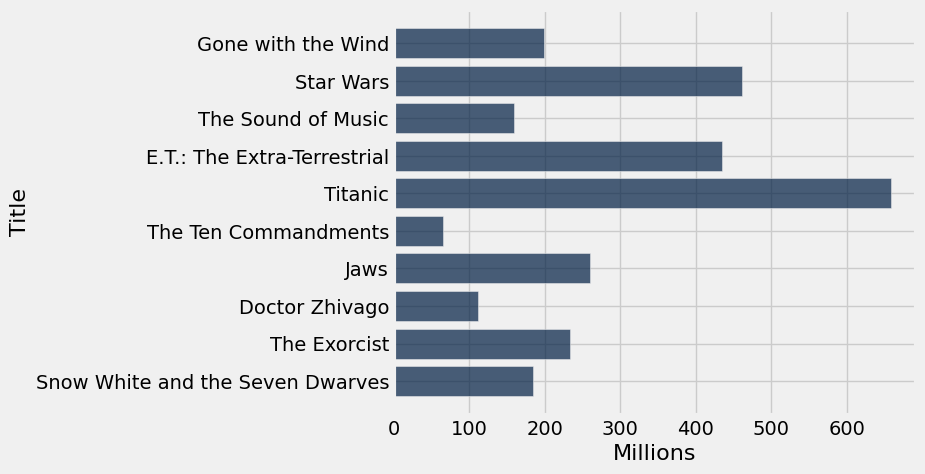

In [18]:
# How many variables are used in this bar chart?
top10_adjusted.barh('Title', 'Millions')

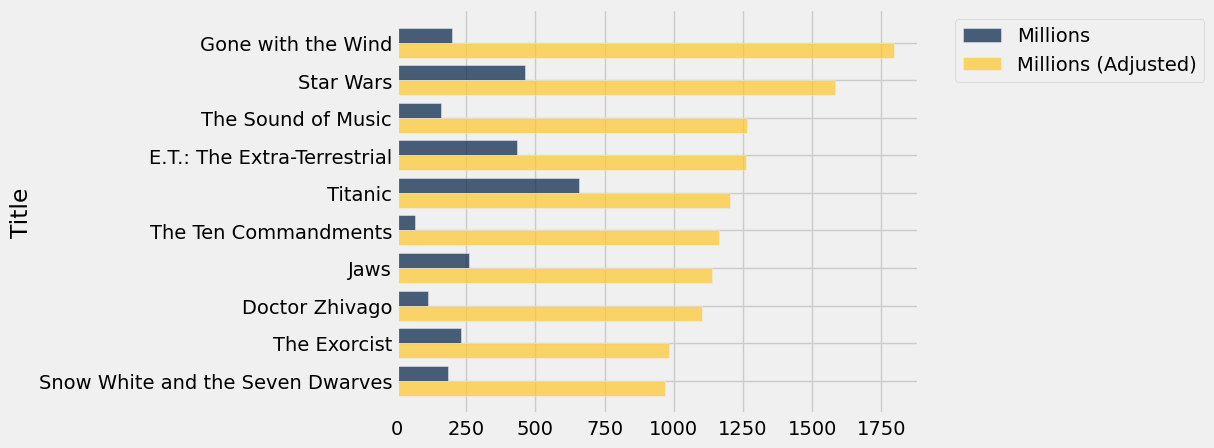

In [19]:
in_millions = top10_adjusted.select('Title', 'Millions', 'Millions (Adjusted)')
in_millions.barh('Title')

## Question on the Slides ##
Exercise: Generate the chart shown in the slides: a bar chart of age (# years since release) for the 10 highest grossing movies (non-adjusted).

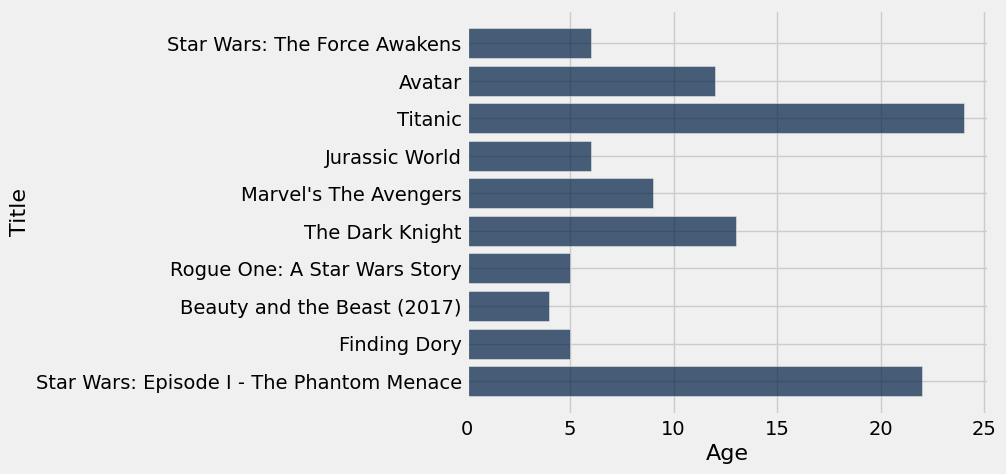

In [20]:
top10_gross = top_movies.sort('Gross', descending=True).take(np.arange(10))
top10_gross = top10_gross.with_columns('Age', 2021 - top10_gross.column('Year'))
top10_gross.barh('Title', 'Age')